# Geoquímica de Rocas Ígneas y Test de Hipótesis

## Importar librerías

Importemos la librerías que utilizaremos hoy. Incluyendo la librería seaborn que la usaremos por primera vez.

In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualización de distribuciones de datos y comparación entre poblaciones.

Hoy vamos a pasar a tratar con un tipo diferente de datos: datos de geoquímica ígnea. Las rocas ígneas son aquellas que cristalizan a partir del enfriamiento del magma. Los diferentes magmas tienen diferentes composiciones asociadas a su origen. Durante la clase de hoy, nos centraremos en los datos de los flujos de lava (estos se llaman rocas volcánicas).

Existe una gran base de datos de datos geoquímicos de rocas llamada Earthchem: https://www.earthchem.org

## Importar un marco de datos de datos de geoquímica ígnea

Trabajemos con un subconjunto de datos de Earthchem que contiene datos geoquímicos de rocas ígneas. En la carpeta de datos en un archivo llamadas ign.csv aunque en realidad está separado por tabuladores. Viene de aquí: https://github.com/brenhinkeller/StatisticalGeochemistry

In [11]:
igneous_data = pd.read_csv('./data/ign.csv',sep='\t')

C:\Users\dego\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Veamos qué datos están disponibles.

In [12]:
igneous_data.head

<bound method NDFrame.head of             ID SAMPLE ID  SOURCE   REFERENCE                LOCALITY  \
0      KV68702   D102672    USGS  USGS, 2004                     NaN   
1      KV68701   W256427    USGS  USGS, 2004                     NaN   
2      KV68700   W257449    USGS  USGS, 2004                     NaN   
3      KV68699   W256919    USGS  USGS, 2004                     NaN   
4      KV68698   W250537    USGS  USGS, 2004                     NaN   
...        ...       ...     ...         ...                     ...   
68691      KV5       NaN  Condie         NaN       Boulder Creek, CO   
68692      KV4       NaN  Condie         NaN       Boulder Creek, CO   
68693      KV3       NaN  Condie         NaN  Adachi, Japan tonalite   
68694      KV2       NaN  Condie         NaN  Adachi, Japan tonalite   
68695      KV1       NaN  Condie         NaN  Adachi, Japan tonalite   

                                                METHODS MATERIAL      TYPE  \
0                          

Muchos datos geoquímicos diferentes. Tenga en cuenta que los elementos principales se dan como porcentaje en peso y los elementos secundarios son partes por millón (ppm).

## Filtrado para ver las rocas volcánicas
Hagámoslo de modo que solo estemos tratando con los datos de rocas volcánicas.

In [13]:
volcanic_data = igneous_data[igneous_data['TYPE']=='VOLCANIC']
volcanic_data.head()

,ID,SAMPLE ID,SOURCE,REFERENCE,LOCALITY,METHODS,MATERIAL,TYPE,COMPOSITION,ROCK NAME,ID.1,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,MAX AGE,AGE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,MGO,CAO,NA2O,K2O,P2O5,MNO,H2O_TOTAL,LA,CE,PR,ND,SM,EU,GD,TB,DY,HO,ER,TM,YB,LU,LI,BE,B,C,CO2,F,CL,SC,TI,V,CR,CO,NI,CU,ZN,GA,ZR,OS,RB,BI,HG,BA,Y,PB,TE,NB,SR87_SR86,TL,PT,SN,CD,AS,PD,SR,SE,S,AU,TA,MO,U,CS,SB,AG,W,TH,RE,HF,IR
0,KV68702,D102672,USGS,"USGS, 2004",NaN,UNKNOWN,IGNEOUS,VOLCANIC,MAFIC,BASALT,68702,19.25,-155.13,0.01,0.0,0.01,0.01,49.97,2.57,13.11,1.83,12.49892,9.60,NaN,9.06,10.58,2.24,0.47,0.26,0.17,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,0.02,0.04,0.01,50.0,1.00,500.0,500.0,50.0,200.0,150.0,NaN,30.0,150.0,NaN,NaN,NaN,NaN,150.0,50.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KV68698,W250537,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68698,38.63,-77.79,0.01,144.0,206.00,175.00,49.90,1.11,13.90,NaN,13.70000,9.00,NaN,6.65,9.46,2.76,0.76,0.13,0.21,NaN,8.8,18.0,NaN,11.0,3.20,1.02,NaN,0.70,NaN,NaN,NaN,NaN,3.10,0.45,18.0,NaN,NaN,NaN,0.04,NaN,NaN,43.8,0.67,351.0,84.2,50.3,32.0,130.0,100.0,19.0,91.0,NaN,27.00,NaN,NaN,240.0,27.0,6.0,NaN,3.9,NaN,NaN,8.6,NaN,NaN,NaN,8.5,240.0,NaN,NaN,6.6,0.31,NaN,0.43,0.40,NaN,NaN,NaN,1.90,NaN,2.50,NaN
5,KV68697,W250536,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68697,38.63,-77.79,0.01,144.0,206.00,175.00,49.90,1.05,13.80,NaN,12.90000,8.60,NaN,6.24,8.88,3.77,0.60,0.12,0.22,NaN,7.7,17.0,NaN,9.2,2.94,0.97,NaN,0.69,NaN,NaN,NaN,NaN,2.70,0.38,20.0,NaN,NaN,NaN,0.48,NaN,NaN,41.6,0.66,354.0,72.6,47.9,51.0,159.0,95.0,18.0,82.0,NaN,19.00,NaN,NaN,170.0,25.0,5.0,NaN,3.5,NaN,NaN,12.0,NaN,NaN,NaN,4.6,350.0,NaN,NaN,6.4,0.27,NaN,0.77,0.53,NaN,NaN,NaN,1.90,NaN,2.20,NaN
14,KV68688,M199970,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68688,57.45,-133.92,0.01,65.0,248.00,156.50,49.90,1.34,16.10,NaN,7.84000,4.36,NaN,8.82,6.72,4.49,0.70,0.13,0.10,NaN,4.8,12.0,NaN,7.7,2.59,0.97,3.00,0.43,NaN,NaN,NaN,NaN,1.20,0.18,NaN,NaN,NaN,NaN,0.68,NaN,NaN,43.2,NaN,300.0,266.0,36.0,80.0,78.0,190.0,NaN,98.0,NaN,9.40,NaN,NaN,150.0,24.0,NaN,NaN,10.0,NaN,NaN,6.5,NaN,NaN,1.7,9.8,380.0,NaN,0.01,NaN,0.40,NaN,NaN,0.22,NaN,NaN,NaN,0.50,NaN,2.10,NaN
16,KV68686,M180720,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; EDXRF,IGNEOUS,VOLCANIC,MAFIC,BASALT,68686,60.06,-160.39,0.01,65.0,248.00,156.50,49.90,0.86,15.70,NaN,10.90000,7.49,NaN,4.10,6.38,5.10,1.14,0.28,0.24,NaN,10.9,25.7,NaN,13.9,3.35,1.00,3.97,0.54,NaN,NaN,NaN,0.34,2.19,0.31,NaN,NaN,NaN,NaN,1.76,NaN,NaN,31.7,NaN,270.0,14.1,26.6,9.9,NaN,81.7,NaN,90.1,NaN,9.99,NaN,NaN,1300.0,20.0,NaN,NaN,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,0.49,NaN,0.61,0.22,NaN,NaN,NaN,1.53,NaN,2.01,NaN


# Visualizando los datos
Un tipo de visualización que hemos usado bastante son los histogramas. Grafiquemos cuánto $SiO_2$ hay en las rocas volcánicas que están en la base de datos Earthchem

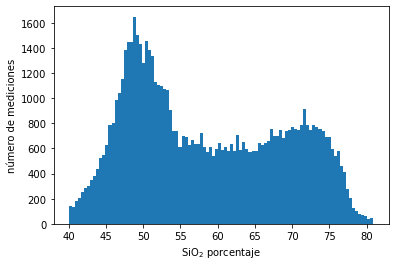

In [14]:
plt.hist(igneous_data['SIO2'],bins=100)
plt.xlabel('SiO$_2$ porcentaje')
plt.ylabel('número de mediciones')
plt.show()

Recuerde que en lugar de que el eje y sea un número de valores, podemos hacer que sea densidad usando ``density = true`` (normalizado para formar una densidad de probabilidad, es decir, el área (o integral) debajo del histograma sumará 1). Dado que el recuento en sí es bastante arbitrario, esta puede ser una forma ventajosa de trazar una distribución.

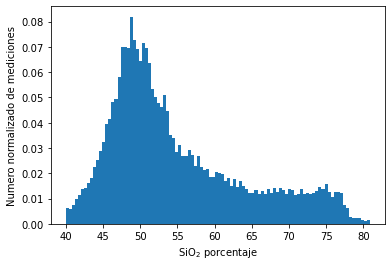

In [15]:
plt.hist(volcanic_data['SIO2'],bins=100,density=...)
plt.xlabel('SiO$_2$ porcentaje')
plt.ylabel('Numero normalizado de mediciones')
plt.show()

## Estimación de la densidad kernel 

Una de las formas de representar la distribución de un conjunto de puntos de datos se conoce como 'estimación de la densidad kernel'. Esta es una forma útil de mostrar la distribución de datos. Coloca un 'kernel' (generalmente una distribución normal) en cada punto de datos y luego los suma. Esto evita la complejidad de tener que elegir un tamaño de bin asociado con histogramas, por ejemplo.

Aquí hay una ilustración de cómo funciona esto. 
<img src="./images/kde.png" width = 600>
[Fuente: https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png Wikimedia Creative Commons]

Hay dos opciones que son importantes al desarrollar una estimación de la densidad kernel: la forma del "kernel" y el ancho de banda que establece el ancho del kernel. La forma no acaba importando demasiado, pero sí el ancho de banda. Hay "reglas generales" para el ancho de banda que se implementan con valores predeterminados (y por lo tanto se utilizan a menudo), pero se pueden ajustar y, a menudo, no está claro cuál es la "elección correcta".


## Desarrollando una estimación de la densidad del kernel con ```kdeplot```

La función ```kdeplot``` de la librería seaborn genera una estimación de densidad de un kernel y luego la plotea. Nótese que a hasta este punto está usando matplotlib para plotear y statsmodels, scipy y numpy para implementar métodos estadísticos. Combinando todas estas en funciones se pueden realizar tareas rápidamente. Para determinar un kernel, se suele usar el valor predeterminado es un kernel gaussiano y la regla empírica de Scott para el ancho de banda.

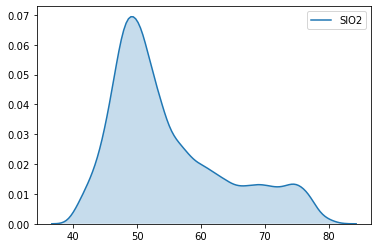

In [16]:
sns.kdeplot(volcanic_data['SIO2'],shade=True)

La función `sns.distplot` ploteará tanto un histograma de densidad normalizada como una curva de estimación de densidad del kernel.

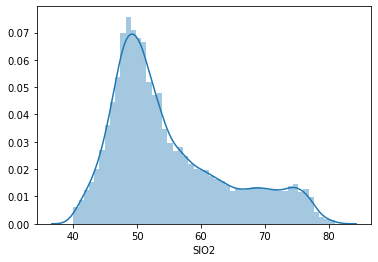

In [17]:
sns.distplot(volcanic_data['SIO2'])
plt.show()

## Hacer un histograma / diagrama de dispersión bivariante

Si queremos investigar cómo otro aspecto de la química de las rocas volcánicas se relaciona con el contenido de sílice, podemos usar `sns.joinplot` para hacer un diagrama cruzado. Veamos aquí cómo se relaciona el contenido de hierro (FeO) con el contenido de sílice.

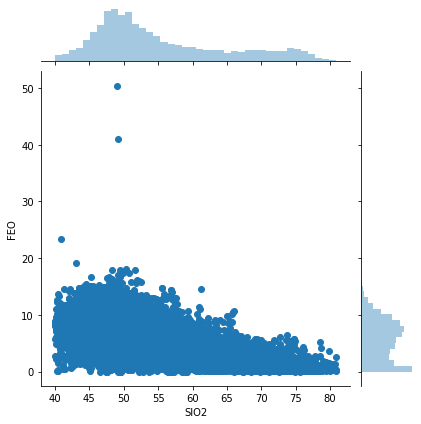

In [18]:
sns.jointplot(volcanic_data['SIO2'], volcanic_data['FEO'])
plt.show()

Es bastante difícil ver lo que está pasando allí. Quizás sea mejor si cambiamos el límite y para que sea más ajustado en los datos y hagamos que los símbolos tengan transparencia.

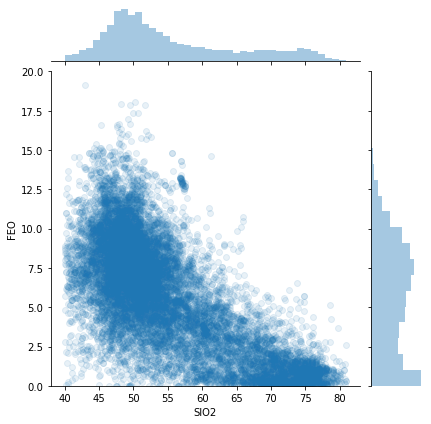

In [19]:
sns.jointplot(volcanic_data['SIO2'], volcanic_data['FEO'],alpha=0.1)
plt.ylim(0,20)
plt.show()

## Hacer una gráfica de densidad de un kernel bivariante

Todavía es bastante difícil ver lo que está sucediendo en la gráfico anterior, pero es una mejora. Usemos una estimación de la densidad del kernel. Aquí se usa la misma estimación de densidad de un kernel y se muestra para los datos univariados en cada eje. Sin embargo, ahora también tenemos una estimación de densidad de kernel bivariada. Tomados en conjunto, podemos ver que existe una fuerte relación entre los niveles de SiO $_2$ y los niveles de FeO en las rocas volcánicas.

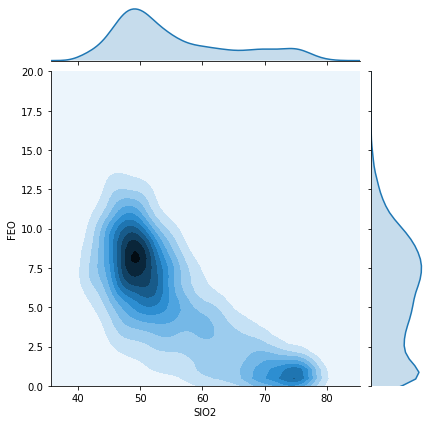

In [20]:
sns.jointplot(volcanic_data['SIO2'], volcanic_data['FEO'],kind='kde')
plt.ylim(0,20)
plt.show()

## Máfico contra félsico

Esta ilustración proporciona una descripción general de la diferencia de composición entre diferentes tipos de rocas ígneas:

<img src = "./images/mafic_felsic.jpg" width = 600>

Estas diferencias de composición se manifiestan en diferentes propiedades de los materiales que se pueden observar en los volcanes activos:

- lava máfica que fluye (Kilauea, Hawái): https://www.youtube.com/watch?v=amTENlOiVFU
- Cúpula de dacita que crece dentro del monte Saint Helens: https://www.youtube.com/watch?v=h6B1myUKAS4 https://www.youtube.com/watch?v=3v7p9mMV6M8 * composición de 65 por ciento de SiO2 (dacita) *
- erupción del monte Santa Helena: https://www.youtube.com/watch?v=AYla6q3is6w
- erupción intermedia (Krakatau, Indonesia): https://www.youtube.com/watch?v=NLhjNzQHphQ

## Evaluación de diferencias de composición entre volcánicas máficas, intermedias y félsicas (hierro)

Centrémonos primero en la diferencia entre el contenido de hierro

C:\Users\dego\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dego\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


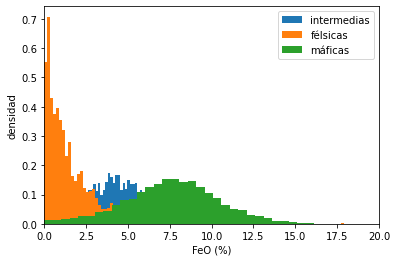

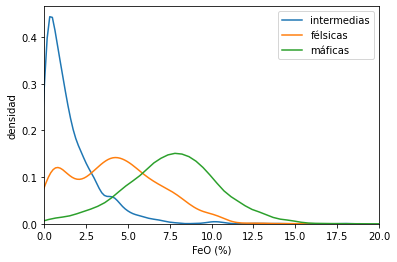

In [21]:
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['FEO'],bins=100,density=True,label='intermedias')
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['FEO'],bins=100,density=True,label='félsicas')
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['FEO'],bins=100,density=True,label='máficas')
plt.xlim(0,20)
plt.xlabel('FeO (%)')
plt.ylabel('densidad')
plt.legend()
plt.show()

sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['FEO'],label='intermedias')
sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['FEO'],label='félsicas')
sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['FEO'],label='máficas')
plt.xlim(0,20)
plt.xlabel('FeO (%)')
plt.ylabel('densidad')
plt.show()

## Otra forma de visualizar las distribuciones

### El diagrama de caja

> Un diagrama de caja (y bigotes) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable. El cuadro muestra los cuartiles del conjunto de datos mientras que los bigotes se extienden para mostrar el resto de la distribución, excepto para los puntos que se determinan como "valores atípicos" mediante un método que es una función del rango intercuartil. *De seaborn docstring*

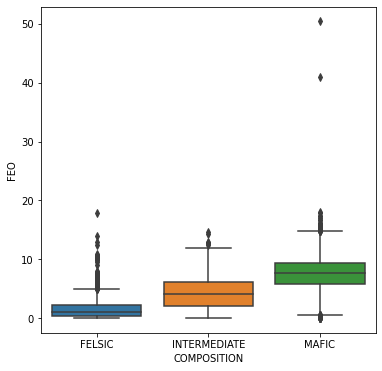

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.show()

### Gráfico de violín

Tal vez te gusta diagramas de caja, pero también nos interesan las estimaciones de densidad de probabilidad. Bueno, estamos de suerte ya que el gráfico del violín los une a ambos.

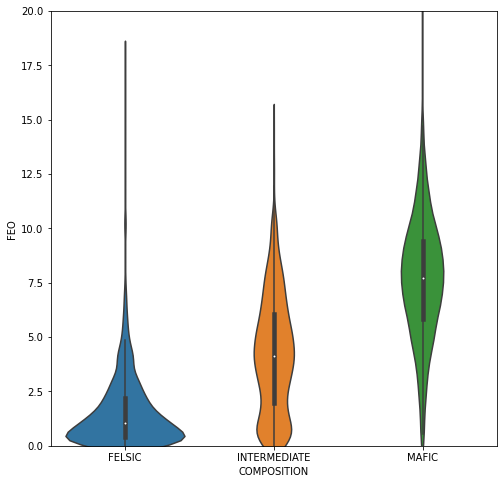

In [23]:
plt.figure(figsize=(8,8))
sns.violinplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.ylim(0,20)
plt.show()

## Evaluación de diferencias de composición entre volcánicas máficas, intermedias y félsicas (sodio)

Al observar la gráfica de composición de estas ilustraciones, vemos que indica que hay más hierro en las rocas máficas (que parece ser el caso). También indicó que hay más sodio en las rocas félsicas.

<img src = "./images/mafic_felsic.jpg" width=600>

Realice los siguientes gráficos para evaluar esta afirmación:

- diagrama bivariante de NA2O vs SI02 para todo el conjunto volcanic_data. Hacer dos gráficos bivariantes: uno que sea con la opción `kind = 'kde'` y otro que con la opción `kind =' hex'`
- un gráfico de violín de NA2O categorizada por composición

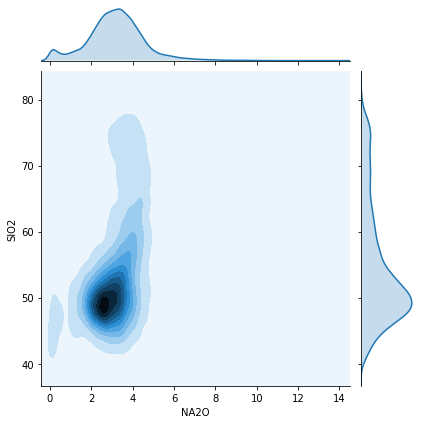

In [24]:
## Código para escribir - Grafico bivariante con kind = ´kde´
sns.jointplot(volcanic_data['NA2O'], volcanic_data['SIO2'],kind='kde')
plt.show()


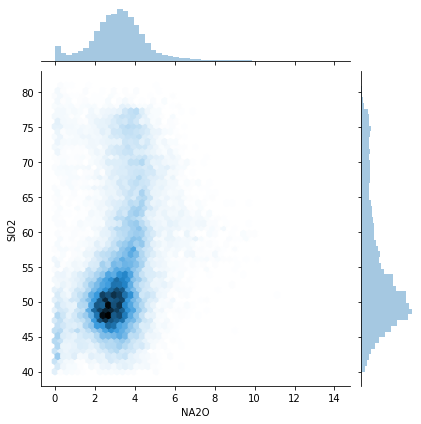

In [25]:
## Código para escribir - Grafico bivariante con kind = ´hex´
sns.jointplot(volcanic_data['NA2O'], volcanic_data['SIO2'],kind='hex')
plt.show()

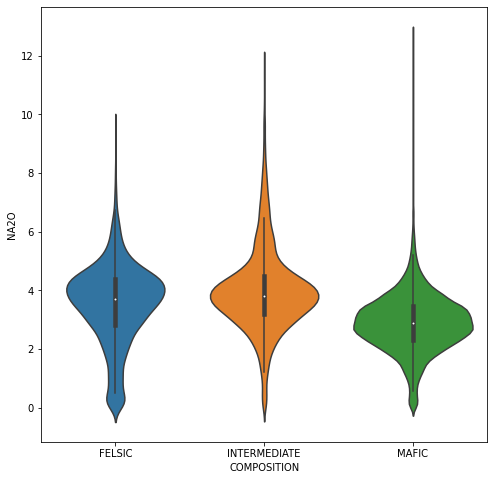

In [26]:
## Código para escribir - Grafico de violín
plt.figure(figsize=(8,8))
sns.violinplot(x="COMPOSITION", y="NA2O", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.show()


Una vez que haya realizado estas visualizaciones, calcule el NA2O promedio en rocas volcánicas félsicas, intermedias y máficas. Asigne estos valores para que sean `mafic_NA20_mean`, `intermediate_NA20_mean` y` felsic_NA20_mean` e imprímalos en pantalla.

In [27]:
felsic_NA20=np.mean(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['NA2O'])
intermediate_NA20_mean=np.mean(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['NA2O'])
mafic_NA20_mean=np.mean(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['NA2O'])
print(felsic_NA20,intermediate_NA20_mean,mafic_NA20_mean)

3.523135415441164 3.9643710676156614 2.8843032372697865


¿Estos valores encajan con la ilustración esquemática del diagrama félsico / máfico? ¿Qué es consistente y qué no?

Los promedios no estan tan alejandos de los valores graficados de mayor frecuencia, sin embargo el grafico de composicion intermedia presenta el dato con mayor frecuencia con un valor menor al de roca felsica, y en el caso de la composicion intermedia, su promedio resulta ser mayor que el de la roca felsica.

# Pruebas A/B
> En el análisis de datos moderno, decidir si dos muestras numéricas provienen de la misma distribución subyacente se denomina prueba A / B. El nombre se refiere a las etiquetas de las dos muestras, A y B.

> **Las hipótesis**

> Podemos intentar responder a esta pregunta mediante una prueba de hipótesis. El modelo de azar que probaremos dice que no hay una diferencia subyacente en las poblaciones; las distribuciones en las muestras son diferentes debido al azar.

> Formalmente, esta es la hipótesis nula. Tendremos que descubrir cómo simular una estadística útil bajo esta hipótesis. Pero para empezar, establezcamos las dos hipótesis naturales.

*de https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html*

En el ejemplo en clases, vimos la variación del peso al nacer de los bebés cuando la madre era fumadora y cuando la madre no fumaba. Las dos hipótesis y el estadístico de prueba fueron:

> **Hipótesis nula**: En la población, la distribución del peso al nacer de los bebés es la misma para las madres que no fuman que para las madres que sí. La diferencia en la muestra se debe al azar.

> **Hipótesis alternativa**: En la población, los bebés de las madres fumadoras tienen un peso al nacer, en promedio, menor que los bebés de las no fumadoras.

> **Estadística de prueba**

> La hipótesis alternativa compara el peso promedio al nacer de los dos grupos y dice que el promedio de las madres que fuman es menor. Por lo tanto, es razonable que usemos la diferencia entre las medias de los dos grupos como nuestra estadística.

> Haremos la resta en el orden "peso medio del grupo fumador - peso medio del grupo no fumador". Los valores pequeños (es decir, valores negativos grandes) de esta estadística favorecerán la hipótesis alternativa.

Podemos utilizar este mismo enfoque al considerar el contenido de sodio de las muestras de lava. donde la **hipótesis nula** es que el contenido de sodio es el mismo para rocas de diferente composición y la diferencia en la muestra es el resultado del azar. La **hipótesis alternativa** es que el contenido de sodio de las lavas félsicas es, en promedio, más alto.

## Prueba de la hipótesis nula de que no hay diferencia en el contenido de sodio de las lavas máficas y félsicas

Para empezar, consideremos la diferencia entre lavas máficas y félsicas.

In [28]:
volcanic_felsic_mafic = volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC') | (volcanic_data['COMPOSITION']=='MAFIC')]
volcanic_felsic_mafic = pd.DataFrame(volcanic_felsic_mafic,columns=['COMPOSITION','SIO2','NA2O'])
volcanic_felsic_mafic = volcanic_felsic_mafic.dropna()
volcanic_felsic_mafic.tail()

,COMPOSITION,SIO2,NA2O
66051,FELSIC,67.77,5.17
66052,FELSIC,67.56,6.12
66053,FELSIC,67.39,4.98
66055,FELSIC,63.99,4.67
66082,MAFIC,50.45,7.36


In [29]:
felsic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='FELSIC']['NA2O'])
mafic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='MAFIC']['NA2O'])

felsic_NA20_mean - mafic_NA20_mean

0.6388321781713775

Definamos una función que pueda hacer este cálculo y también hagamos una función para la diferencia entre medias y la medianas:

In [30]:
def difference_of_means(dataframe,value,category_column,category_values):
    '''
    Function to calculate the difference of mean from a dataframe.
    
    Parameters
    ----------
    dataframe : the pandas dataframe containing the data
    value : the column for which the mean will be calculated (a string)
    category_column : the column that will be used to categorize the data (a string)
    category_values : the values of the category (a list of strings)
    '''
    mean_1 = np.mean(dataframe[dataframe[category_column]==category_values[0]][value])
    mean_2 = np.mean(dataframe[dataframe[category_column]==category_values[1]][value])
    return mean_1 - mean_2

def difference_of_medians(dataframe,value,category_column,category_values):
    '''
    Function to calculate the difference of mean from a dataframe.
    
    Parameters
    ----------
    dataframe : the pandas dataframe containing the data
    value : the column for which the mean will be calculated (a string)
    category_column : the column that will be used to categorize the data (a string)
    category_values : the values of the category (a list of strings)
    '''
    median_1 = np.median(dataframe[dataframe[category_column]==category_values[0]][value])
    median_2 = np.median(dataframe[dataframe[category_column]==category_values[1]][value])
    return median_1 - median_2

In [31]:
felsic_mafic_mean_diff = difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION',['FELSIC','MAFIC'])
felsic_mafic_mean_diff

0.6388321781713775

In [32]:
felsic_mafic_median_diff = difference_of_medians(volcanic_felsic_mafic,'NA2O','COMPOSITION',['FELSIC','MAFIC'])
felsic_mafic_median_diff

0.8300000000000001

## Prueba de la hipótesis nula mediante permutación aleatoria

La diferencia de medias sugiere que la hipótesis alternativa de que las lavas félsicas tienen más sodio en promedio es cierta. ¿Cómo podemos probar que esto no es fruto del azar?

>**Predecir la estadística bajo la hipótesis nula**

> Para ver cómo debería variar el estadístico bajo la hipótesis nula, tenemos que averiguar cómo simular el estadístico bajo esa hipótesis. Un método inteligente basado en permutaciones aleatorias hace precisamente eso

Si no hubiera diferencia entre las dos distribuciones en la población, entonces el hecho de que el contenido de sodio sea de una roca máfica o félsica no debería afectar al promedio. La idea es entonces mezclar todas las etiquetas al azar entre las muestras de rocas. Esto se llama permutación aleatoria.

In [33]:
volcanic_felsic_mafic['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)
volcanic_felsic_mafic.tail()

,COMPOSITION,SIO2,NA2O,COMPOSITION_Shuffled
66051,FELSIC,67.77,5.17,MAFIC
66052,FELSIC,67.56,6.12,MAFIC
66053,FELSIC,67.39,4.98,MAFIC
66055,FELSIC,63.99,4.67,MAFIC
66082,MAFIC,50.45,7.36,MAFIC


In [34]:
difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])

0.003149734812152971

La diferencia anterior es el resultado de una permutación aleatoria. Queremos hacer muchas permutaciones aleatorias para probar la hipótesis.

In [35]:
dif_permuations_fel_maf_mean = []
dif_permuations_fel_maf_median = []

repetitions = 1000

for i in np.arange(repetitions):
    volcanic_felsic_mafic['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)
    
    new_mean_diff = difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])
    dif_permuations_fel_maf_mean.append(new_mean_diff) 
    
    new_median_diff = difference_of_medians(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])
    dif_permuations_fel_maf_median.append(new_median_diff) 

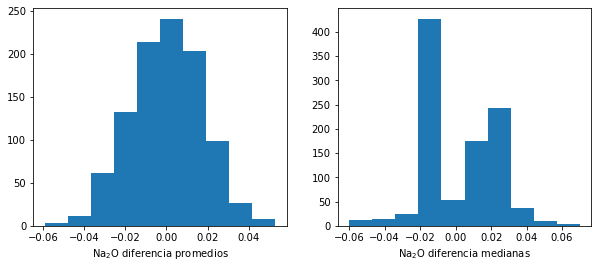

In [36]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dif_permuations_fel_maf_mean,label='permutations')
plt.xlabel('Na$_2$O diferencia promedios')

plt.subplot(1,2,2)
plt.hist(dif_permuations_fel_maf_median,label='permutations')
plt.xlabel('Na$_2$O diferencia medianas')

plt.show()

Observe cómo las distribuciones se centran alrededor de 0. Esto tiene sentido, porque bajo la hipótesis nula los dos grupos deberían tener aproximadamente el mismo promedio. Por lo tanto, la diferencia entre los promedios de los grupos debe estar alrededor de 0.

## Comparando las permutaciones aleatorias con la diferencia real

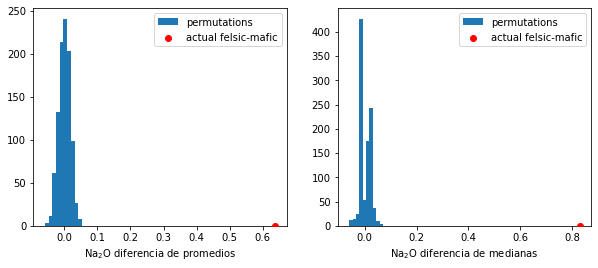

In [37]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dif_permuations_fel_maf_mean,label='permutations')
plt.scatter(felsic_mafic_mean_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O diferencia de promedios')
plt.legend()

plt.subplot(1,2,2)
plt.hist(dif_permuations_fel_maf_median,label='permutations')
plt.scatter(felsic_mafic_median_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O diferencia de medianas')
plt.legend()
plt.show()

In [38]:
cuenta=0
for i in (dif_permuations_fel_maf_mean):
    if i<=felsic_mafic_mean_diff:
        cuenta+=1
        
mean_empirical_p=cuenta/repetitions
print(mean_empirical_p)

1.0


In [39]:
#mean_empirical_p = np.count_nonzero(dif_permuations_fel_maf_mean <= felsic_mafic_mean_diff) / repetitions
#mean_empirical_p

TypeError: '<=' not supported between instances of 'list' and 'float'

In [41]:
median_empirical_p = np.count_nonzero(dif_permuations_fel_maf_median >= felsic_mafic_median_diff) / repetitions
median_empirical_p

0.0

Los valores P empíricos son 0, lo que significa que ninguna de las 5.000 muestras permutadas resultó en una diferencia tan grande como la observada en las muestras reales. Esto es solo una aproximación. La probabilidad exacta de obtener una diferencia en ese rango no es 0, pero es extremadamente pequeña.

Así que parece estar bien fundamentado que los magmas félsicos tienen más Na $ _2 $ O que los magmas máficos.

## Prueba de la hipótesis nula de que no hay diferencia en el contenido de sodio de las lavas intermedias y félsicas

In [42]:
volcanic_felsic_int = volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC') | (volcanic_data['COMPOSITION']=='INTERMEDIATE')]
volcanic_felsic_int = volcanic_felsic_int[(volcanic_felsic_int['SIO2'] < 64) & (volcanic_felsic_int['SIO2'] > 51)]
volcanic_felsic_int = pd.DataFrame(volcanic_felsic_int,columns=['COMPOSITION','SIO2','NA2O'])
volcanic_felsic_int = volcanic_felsic_int.dropna()
volcanic_felsic_int.tail()

,COMPOSITION,SIO2,NA2O
66077,INTERMEDIATE,56.22,8.73
66078,INTERMEDIATE,55.52,8.42
66079,INTERMEDIATE,54.61,6.97
66080,INTERMEDIATE,53.15,8.15
66081,INTERMEDIATE,51.98,7.43


**Calcule la diferencia en la mediana y la diferencia en la media entre el NA2O de las lavas intermedias y félsicas. Asígnelas a variables e imprimalas en pantalla.**

In [43]:
felsic_int_mean_diff = difference_of_means(volcanic_felsic_int,'NA2O','COMPOSITION',['INTERMEDIATE','FELSIC'])
print(felsic_int_mean_diff)


0.320139326380771


In [45]:
felsic_int_median_diff = difference_of_medians(volcanic_felsic_int,'NA2O','COMPOSITION',['INTERMEDIATE','FELSIC'])
print(felsic_int_median_diff)

0.029999999999999805


In [46]:
## Código para escribir 

dif_permuations_fel_int_mean = []
dif_permuations_fel_int_median = []

repetitions = 1000

for i in np.arange(repetitions):
    volcanic_felsic_int['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_int['COMPOSITION'].values)
    
    new_mean_diff = difference_of_means(volcanic_felsic_int,'NA2O','COMPOSITION_Shuffled',['INTERMEDIATE','FELSIC'])
    dif_permuations_fel_int_mean.append(new_mean_diff) 
    
    new_median_diff = difference_of_medians(volcanic_felsic_int,'NA2O','COMPOSITION_Shuffled',['INTERMEDIATE','FELSIC'])
    dif_permuations_fel_int_median.append(new_median_diff) 

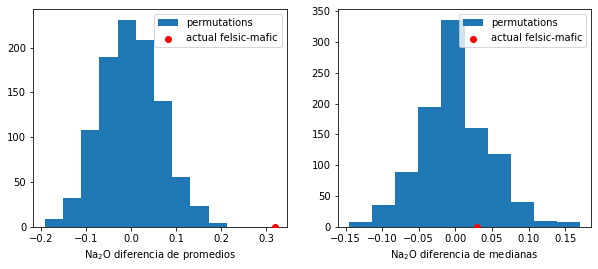

In [47]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dif_permuations_fel_int_mean,label='permutations')
plt.scatter(felsic_int_mean_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O diferencia de promedios')
plt.legend()

plt.subplot(1,2,2)
plt.hist(dif_permuations_fel_int_median,label='permutations')
plt.scatter(felsic_int_median_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O diferencia de medianas')
plt.legend()
plt.show()



**Calcule el valor p para la mediana y la media**

**Mezcla las composiciones dentro del dataframe `volcanic_felsic_int`. Hágalo 1000 veces y haga histogramas de la media y la mediana de estas permutaciones que incluyan la mediana real y la media que calculó**

In [50]:
cuenta=0
for i in (dif_permuations_fel_maf_mean):
    if i<=felsic_mafic_mean_diff:
        cuenta+=1
        
empirical_p_mean=cuenta/repetitions
print(empirical_p_mean)


1.0


In [49]:
empirical_p_median = np.count_nonzero( dif_permuations_fel_int_median <= felsic_int_median_diff) / repetitions
print(empirical_p_median)

0.759
